# Libraries

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')
%precision 2

'%.2f'

In [130]:
data = pd.read_csv('vehicle_stolen_dataset_ with_headers.csv')
data.head()

,number_plate,brand,color,time,stoled
0,N001,BMW,black,night,yes
1,N002,Audi,black,night,no
2,N003,NISSAN,black,night,yes
3,N004,VEGA,red,day,yes
4,N005,BMW,blue,day,no


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   number_plate  20 non-null     object
 1   brand         20 non-null     object
 2   color         20 non-null     object
 3   time          20 non-null     object
 4   stoled        20 non-null     object
dtypes: object(5)
memory usage: 928.0+ bytes


In [132]:
data.describe()

,number_plate,brand,color,time,stoled
count,20,20,20,20,20
unique,20,4,3,2,2
top,N019,BMW,black,day,yes
freq,1,6,9,12,13


In [133]:
data.shape

(20, 5)

In [134]:
data.corr()

""


# Deleting number_plate column

In [135]:
del data['number_plate'] 

In [136]:
data.head()

,brand,color,time,stoled
0,BMW,black,night,yes
1,Audi,black,night,no
2,NISSAN,black,night,yes
3,VEGA,red,day,yes
4,BMW,blue,day,no


In [137]:
data.value_counts()

brand   color  time   stoled
Audi    black  day    yes       2
BMW     black  night  yes       2
NISSAN  black  day    yes       1
VEGA    red    day    yes       1
        black  night  yes       1
               day    yes       1
NISSAN  red    day    no        1
        blue   day    no        1
        black  night  yes       1
BMW     red    night  yes       1
Audi    black  night  no        1
BMW     red    day    no        1
        blue   day    yes       1
                      no        1
Audi    red    day    no        1
        blue   night  yes       1
               day    yes       1
VEGA    red    night  no        1
dtype: int64

In [138]:
data.isnull().sum()

brand     0
color     0
time      0
stoled    0
dtype: int64

# Convert Into Numeric Forms

In [139]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['brand'] =le.fit_transform(data['brand'])
data['color'] =le.fit_transform(data['color'])
data['time'] =le.fit_transform(data['time'])
data['stoled'] =le.fit_transform(data['stoled'])
data.head()


,brand,color,time,stoled
0,1,0,1,1
1,0,0,1,0
2,2,0,1,1
3,3,2,0,1
4,1,1,0,0


# Checking For Outliers

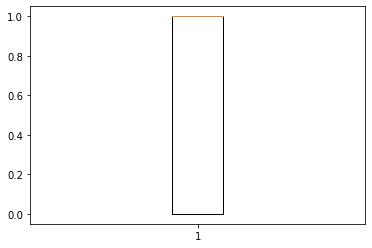

In [141]:
import matplotlib.pyplot as plt
plt.boxplot(data['stoled'])
plt.show()

# Predictions

In [142]:
x = data[['brand','color','time']]
y = data['stoled']

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [144]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [145]:
y_pred

array([1, 0, 0, 1, 0])

In [146]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
result=confusion_matrix(y_test,y_pred)
print(result)

[[2 0]
 [1 2]]


# Accuracy

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



# New Input and Output (BMW:black:night -- Yes )

In [148]:
new_input=[[1,0,1]]
new_output=nb.predict(new_input)
print(new_input,new_output)

[[1, 0, 1]] [1]
